# 02 positional value Notebook

This notebook implements the analysis for the 02 positional value stage of the Fantasy Football Analysis project.

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [13]:
# TODO: Implement 02 positional value analysis

In [14]:
# Import project modules
from src.data.data_loader import load_config, load_all_data
from src.data.data_loader import load_csv_data
from src.analysis.position_value import (
    calculate_vorp,
    analyze_positional_scarcity,
    analyze_position_groups
)
from src.visualization.position_vis import (
    plot_vorp_by_position,
    plot_positional_scarcity,
    plot_position_group_comparison
)
from src.utils.validation import validate_analysis_output

# Set pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [15]:
# 1. Load configuration and processed data
config = load_config()
performance_df = load_csv_data(os.path.join(config['data_paths']['processed_data'], 'player_performance.csv'))

2025-03-28 21:14:19,027 - INFO - Configuration loaded from config/config.yaml
2025-03-28 21:14:19,028 - INFO - Loading data from data/processed/player_performance.csv
2025-03-28 21:14:19,055 - INFO - Loaded dataframe with shape: (629, 270)
2025-03-28 21:14:19,058 - WARNING - Missing values detected in data/processed/player_performance.csv:
2025-03-28 21:14:19,058 - WARNING -   - Rushing Y/A: 307 missing values
2025-03-28 21:14:19,058 - WARNING -   - Receiving Y/R: 172 missing values
2025-03-28 21:14:19,059 - WARNING -   - 2PM: 585 missing values
2025-03-28 21:14:19,059 - WARNING -   - 2PP: 607 missing values
2025-03-28 21:14:19,060 - WARNING -   - Season_preseason: 453 missing values
2025-03-28 21:14:19,060 - WARNING -   - Tiers: 453 missing values
2025-03-28 21:14:19,060 - WARNING -   - Position: 453 missing values
2025-03-28 21:14:19,060 - WARNING -   - Team_preseason: 453 missing values
2025-03-28 21:14:19,061 - WARNING -   - Team (Alt)_preseason: 453 missing values
2025-03-28 21:14

In [16]:
# 2. Calculate Value Over Replacement Player (VORP)
baseline_values = config['analysis']['baseline_values']
vorp_df = calculate_vorp(performance_df, baseline_values)

# Display top players by VORP
print("Top 20 players by VORP:")
display(vorp_df.sort_values('VORP', ascending=False)[
    ['Player', 'FantPos', 'Team', 'Half_PPR', 'VORP', 'VORP_Per_Game', 'G']
].head(20))

2025-03-28 21:14:19,221 - INFO - Calculating Value Over Replacement Player (VORP)
2025-03-28 21:14:19,224 - INFO - Processing qb: 0 players found
2025-03-28 21:14:19,225 - WARNING - Not enough qb players to establish baseline at rank 12
2025-03-28 21:14:19,226 - INFO - Processing rb: 0 players found
2025-03-28 21:14:19,227 - WARNING - Not enough rb players to establish baseline at rank 24
2025-03-28 21:14:19,228 - INFO - Processing wr: 0 players found
2025-03-28 21:14:19,228 - WARNING - Not enough wr players to establish baseline at rank 24
2025-03-28 21:14:19,229 - INFO - Processing te: 0 players found
2025-03-28 21:14:19,229 - WARNING - Not enough te players to establish baseline at rank 12
2025-03-28 21:14:19,234 - INFO - VORP calculation completed


Top 20 players by VORP:


,Player,FantPos,Team,Half_PPR,VORP,VORP_Per_Game,G
0,Lamar Jackson,QB,BAL,428.38,NaN,NaN,17
1,Josh Allen,QB,BUF,377.04,NaN,NaN,17
2,Joe Burrow,QB,CIN,372.82,NaN,NaN,17
3,Saquon Barkley,RB,PHI,332.80,NaN,NaN,16
4,Jalen Hurts,QB,PHI,315.12,NaN,NaN,15
5,Jayden Daniels,QB,WAS,349.82,NaN,NaN,17
6,Baker Mayfield,QB,TB,363.80,NaN,NaN,17
7,Ja'Marr Chase,WR,CIN,339.50,NaN,NaN,17
8,Jimmy Garoppolo,QB,LAR,19.86,NaN,NaN,1
9,Jahmyr Gibbs,RB,DET,336.90,NaN,NaN,17


In [17]:
# 3. Analyze positional scarcity
scarcity_results = analyze_positional_scarcity(vorp_df)

2025-03-28 21:14:19,245 - INFO - Analyzing positional scarcity
2025-03-28 21:14:19,248 - INFO - Processing QB: 79 players found
2025-03-28 21:14:19,306 - INFO - Processing RB: 147 players found
2025-03-28 21:14:19,401 - INFO - Processing WR: 250 players found
2025-03-28 21:14:19,558 - INFO - Processing TE: 144 players found
2025-03-28 21:14:19,650 - INFO - Calculating position value adjustment factors
2025-03-28 21:14:19,652 - INFO - Processing QB: 79 players found
2025-03-28 21:14:19,653 - INFO - Processing RB: 147 players found
2025-03-28 21:14:19,656 - INFO - Processing WR: 250 players found
2025-03-28 21:14:19,657 - INFO - Processing TE: 144 players found
2025-03-28 21:14:19,660 - INFO - Position value adjustment calculation completed
2025-03-28 21:14:19,661 - INFO - Positional scarcity analysis completed


In [18]:
# Display tier analysis for each position
positions = ['QB', 'RB', 'WR', 'TE']
for pos in positions:
    tier_key = f"{pos}_tiers"
    diff_key = f"{pos}_rank_diffs"
    
    if tier_key in scarcity_results:
        print(f"\n{pos} Tier Analysis:")
        display(scarcity_results[tier_key])
    
    if diff_key in scarcity_results:
        print(f"\nTop 10 {pos} Rank Differentials:")
        display(scarcity_results[diff_key].head(10))

# Display position value adjustments
print("\nPosition Value Adjustment Factors:")
display(scarcity_results['position_value_adjustments'])


QB Tier Analysis:


,Position,Tier,Avg_Points,Std_Dev,Max_Points,Min_Points,Range,Next_Tier_Diff,Prev_Tier_Diff
0,QB,QB1-QB6,368.970000,35.250211,428.38,321.96,106.42,NaN,NaN
1,QB,QB7-QB12,299.490000,16.259603,316.70,279.40,37.30,47.122000,57.598000
2,QB,QB13-QB18,247.036667,19.307426,266.86,220.38,46.48,59.708667,49.011333



Top 10 QB Rank Differentials:


,Rank_Higher,Rank_Lower,Player_Higher,Player_Lower,Points_Higher,Points_Lower,Point_Diff,Pct_Diff
0,1,2,Lamar Jackson,Josh Allen,428.38,377.04,51.34,13.616592
1,2,3,Josh Allen,Joe Burrow,377.04,372.82,4.22,1.131914
2,3,4,Joe Burrow,Baker Mayfield,372.82,363.80,9.02,2.479384
3,4,5,Baker Mayfield,Jayden Daniels,363.80,349.82,13.98,3.996341
4,5,6,Jayden Daniels,Jared Goff,349.82,321.96,27.86,8.653249
5,6,7,Jared Goff,Bo Nix,321.96,316.70,5.26,1.660878
6,7,8,Bo Nix,Jalen Hurts,316.70,315.12,1.58,0.501396
7,8,9,Jalen Hurts,Sam Darnold,315.12,307.96,7.16,2.324977
8,9,10,Sam Darnold,Kyler Murray,307.96,295.24,12.72,4.308359
9,10,11,Kyler Murray,Patrick Mahomes,295.24,282.52,12.72,4.502336



RB Tier Analysis:


,Position,Tier,Avg_Points,Std_Dev,Max_Points,Min_Points,Range,Next_Tier_Diff,Prev_Tier_Diff
0,RB,RB1-RB12,272.241667,43.018589,336.9,226.0,110.9,NaN,NaN
1,RB,RB13-RB24,197.851667,19.100891,222.5,174.1,48.4,39.331667,36.148333
2,RB,RB25-RB36,137.691667,20.692135,165.9,110.7,55.2,30.991667,40.908333



Top 10 RB Rank Differentials:


,Rank_Higher,Rank_Lower,Player_Higher,Player_Lower,Points_Higher,Points_Lower,Point_Diff,Pct_Diff
0,1,2,Jahmyr Gibbs,Saquon Barkley,336.9,332.8,4.1,1.231971
1,2,3,Saquon Barkley,Derrick Henry,332.8,326.9,5.9,1.804833
2,3,4,Derrick Henry,Bijan Robinson,326.9,309.2,17.7,5.724450
3,4,5,Bijan Robinson,Josh Jacobs,309.2,275.1,34.1,12.395493
4,5,6,Josh Jacobs,De'Von Achane,275.1,260.9,14.2,5.442698
5,6,7,De'Von Achane,Kyren Williams,260.9,255.1,5.8,2.273618
6,7,8,Kyren Williams,James Cook,255.1,250.7,4.4,1.755086
7,8,9,James Cook,Jonathan Taylor,250.7,235.7,15.0,6.364022
8,9,10,Jonathan Taylor,Alvin Kamara,235.7,231.3,4.4,1.902291
9,10,11,Alvin Kamara,James Conner,231.3,226.3,5.0,2.209456



WR Tier Analysis:


,Position,Tier,Avg_Points,Std_Dev,Max_Points,Min_Points,Range,Next_Tier_Diff,Prev_Tier_Diff
0,WR,WR1-WR12,232.655000,40.330537,339.5,199.4,140.1,NaN,NaN
1,WR,WR13-WR24,183.850000,8.529681,197.9,172.5,25.4,15.590000,19.450000
2,WR,WR25-WR36,161.066667,8.108619,172.0,147.5,24.5,18.606667,14.993333



Top 10 WR Rank Differentials:


,Rank_Higher,Rank_Lower,Player_Higher,Player_Lower,Points_Higher,Points_Lower,Point_Diff,Pct_Diff
0,1,2,Ja'Marr Chase,Justin Jefferson,339.50,265.98,73.52,27.641176
1,2,3,Justin Jefferson,Amon-Ra St. Brown,265.98,258.68,7.30,2.822019
2,3,4,Amon-Ra St. Brown,Brian Thomas Jr.,258.68,236.50,22.18,9.378436
3,4,5,Brian Thomas Jr.,Drake London,236.50,230.80,5.70,2.469671
4,5,6,Drake London,Terry McLaurin,230.80,226.80,4.00,1.763668
5,6,7,Terry McLaurin,Malik Nabers,226.80,217.10,9.70,4.467987
6,7,8,Malik Nabers,CeeDee Lamb,217.10,210.90,6.20,2.939782
7,8,9,CeeDee Lamb,Mike Evans,210.90,203.40,7.50,3.687316
8,9,10,Mike Evans,Jaxon Smith-Njigba,203.40,203.00,0.40,0.197044
9,10,11,Jaxon Smith-Njigba,Courtland Sutton,203.00,199.80,3.20,1.601602



TE Tier Analysis:


,Position,Tier,Avg_Points,Std_Dev,Max_Points,Min_Points,Range,Next_Tier_Diff,Prev_Tier_Diff
0,TE,TE1-TE6,179.850000,22.537058,206.7,146.9,59.8,NaN,NaN
1,TE,TE7-TE12,130.333333,14.212623,144.6,112.4,32.2,24.673333,44.146667
2,TE,TE13-TE18,103.866667,6.510504,111.1,94.9,16.2,12.358667,23.613333



Top 10 TE Rank Differentials:


,Rank_Higher,Rank_Lower,Player_Higher,Player_Lower,Points_Higher,Points_Lower,Point_Diff,Pct_Diff
0,1,2,Brock Bowers,George Kittle,206.7,197.6,9.1,4.605263
1,2,3,George Kittle,Trey McBride,197.6,188.3,9.3,4.938927
2,3,4,Trey McBride,Jonnu Smith,188.3,178.3,10.0,5.608525
3,4,5,Jonnu Smith,Mark Andrews,178.3,161.3,17.0,10.539368
4,5,6,Mark Andrews,Travis Kelce,161.3,146.9,14.4,9.802587
5,6,7,Travis Kelce,Sam LaPorta,146.9,144.6,2.3,1.590595
6,7,8,Sam LaPorta,Zach Ertz,144.6,140.4,4.2,2.991453
7,8,9,Zach Ertz,Tucker Kraft,140.4,136.3,4.1,3.008070
8,9,10,Tucker Kraft,Pat Freiermuth,136.3,135.8,0.5,0.368189
9,10,11,Pat Freiermuth,David Njoku,135.8,112.5,23.3,20.711111



Position Value Adjustment Factors:


,Position,Startable_Count,Avg_Startable_Points,Std_Dev_Startable,Top_Score,Starter_Cutoff,Top_To_Starter_Diff,Value_Adjustment_Factor
0,QB,12,334.230000,44.738809,428.38,279.4,148.98,1.090351
1,RB,24,235.046667,50.031775,336.90,174.1,162.80,1.219349
2,WR,24,208.252500,37.869313,339.50,172.5,167.00,0.922931
3,TE,12,155.091667,31.486345,206.70,112.4,94.30,0.767369


In [19]:
# 4. Analyze position groups
group_results = analyze_position_groups(vorp_df)

# Display position group stats
for key, df in group_results.items():
    print(f"\n{key.replace('_', ' ').title()}:")
    display(df)

2025-03-28 21:14:19,705 - INFO - Analyzing position groups
2025-03-28 21:14:19,710 - INFO - Processing Primary_Skill: 397 players found
2025-03-28 21:14:19,711 - INFO -   RB: 147 players found
2025-03-28 21:14:19,713 - INFO -   WR: 250 players found
2025-03-28 21:14:19,716 - INFO - Processing Onesies: 223 players found
2025-03-28 21:14:19,718 - INFO -   QB: 79 players found
2025-03-28 21:14:19,721 - INFO -   TE: 144 players found
2025-03-28 21:14:19,722 - INFO - Position group analysis completed



Primary Skill Position Stats:


,Position,Group,Total_Points,Avg_Points,Top_Tier_Avg,Top_Tier_Std,Top_Score,Top_To_Tier_End_Diff,Avg_ADP,Top_Tier_Avg_ADP
0,RB,Primary_Skill,10678.72,72.644354,272.241667,43.018589,336.9,110.9,104.750000,31.300000
1,WR,Primary_Skill,14811.04,59.244160,232.655000,40.330537,339.5,140.1,103.779412,43.818182



Primary Skill Group Stats:


,Group,Total_Points,Avg_Points,Std_Dev,Player_Count,Avg_ADP,ADP_Std
0,Primary_Skill,25489.76,64.205945,75.436252,397,104.217742,68.644905



Onesies Position Stats:


,Position,Group,Total_Points,Avg_Points,Top_Tier_Avg,Top_Tier_Std,Top_Score,Top_To_Tier_End_Diff,Avg_ADP,Top_Tier_Avg_ADP
0,QB,Onesies,9061.42,114.701519,368.97,35.250211,428.38,106.42,131.923077,68.600000
1,TE,Onesies,5260.74,36.532917,179.85,22.537058,206.70,59.80,142.958333,110.333333



Onesies Group Stats:


,Group,Total_Points,Avg_Points,Std_Dev,Player_Count,Avg_ADP,ADP_Std
0,Onesies,14322.16,64.224933,89.399121,223,137.22,71.181083



Draft Capital Allocation:


,Group,Positions,Point_Share,Recommended_Draft_Capital
0,Primary_Skill,RB/WR,64.025448,64.025448
1,Onesies,QB/TE,35.974552,35.974552


<Figure size 1200x800 with 0 Axes>

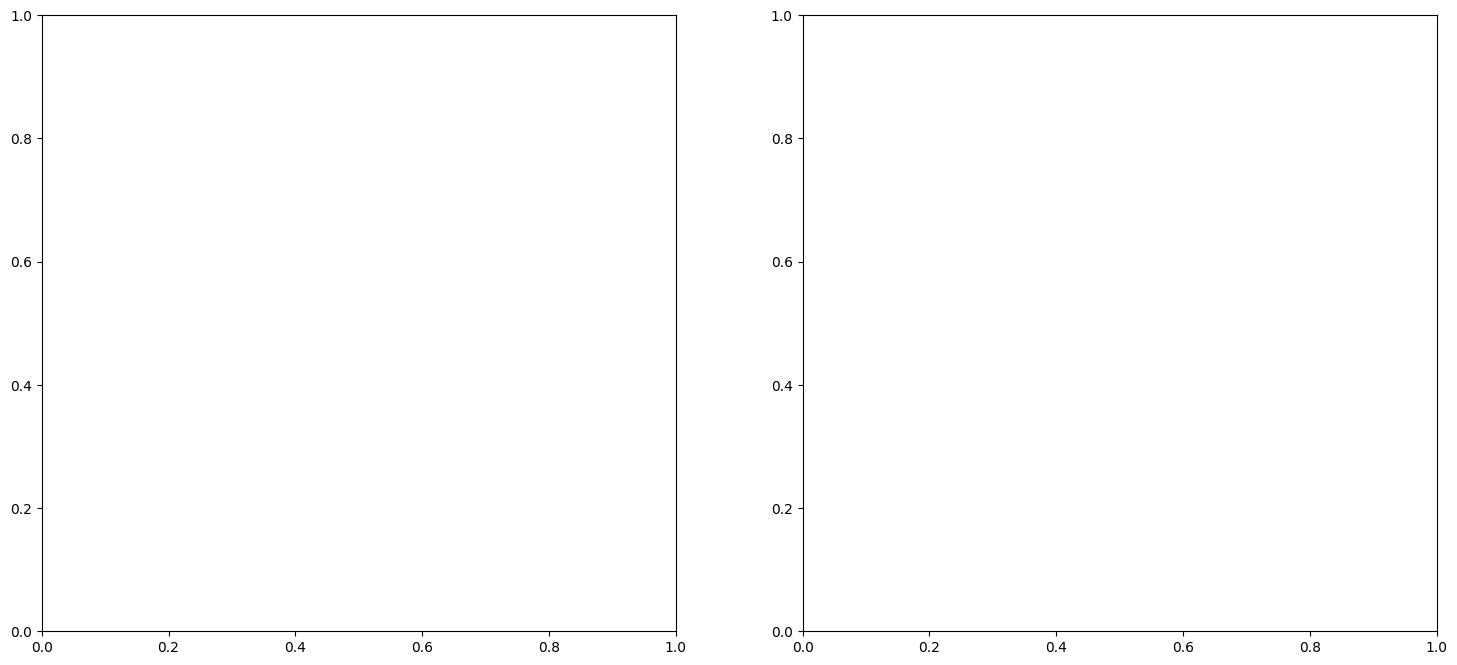

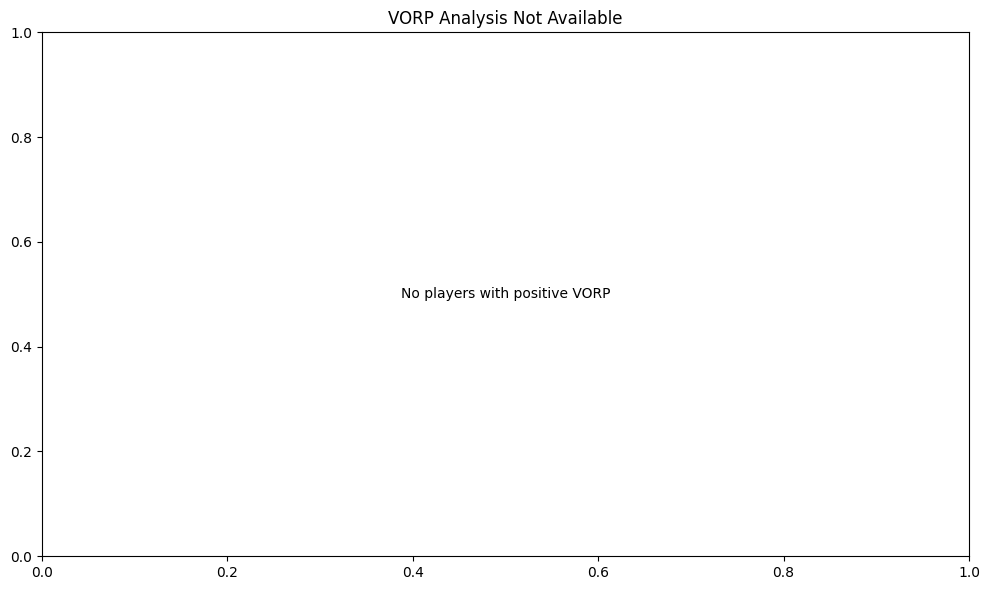

<Figure size 1400x1000 with 0 Axes>

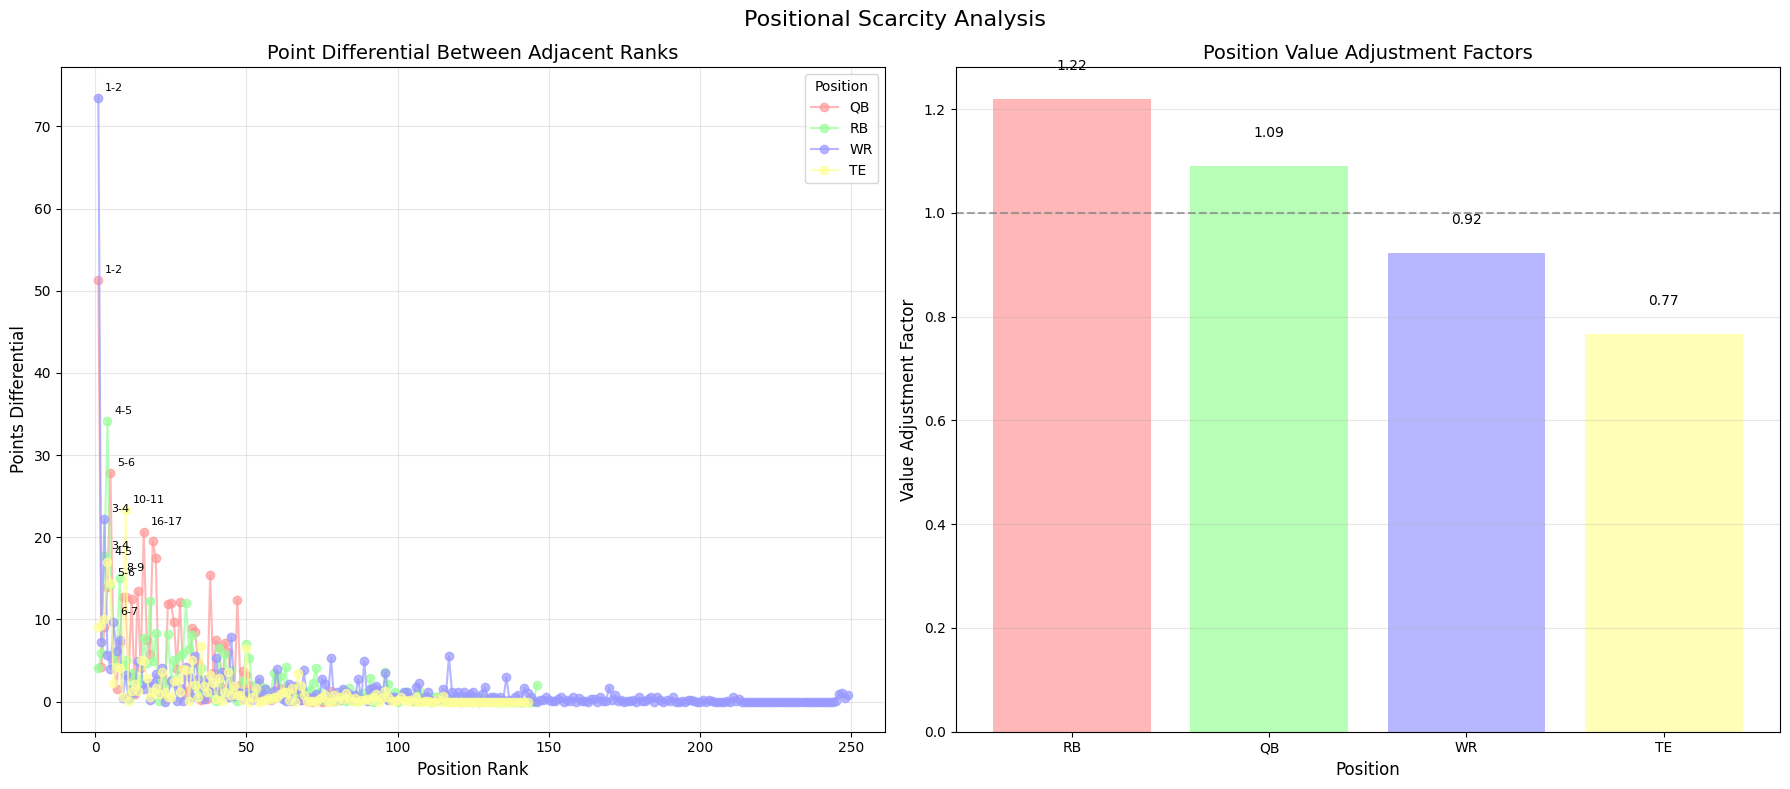

<Figure size 1200x800 with 0 Axes>

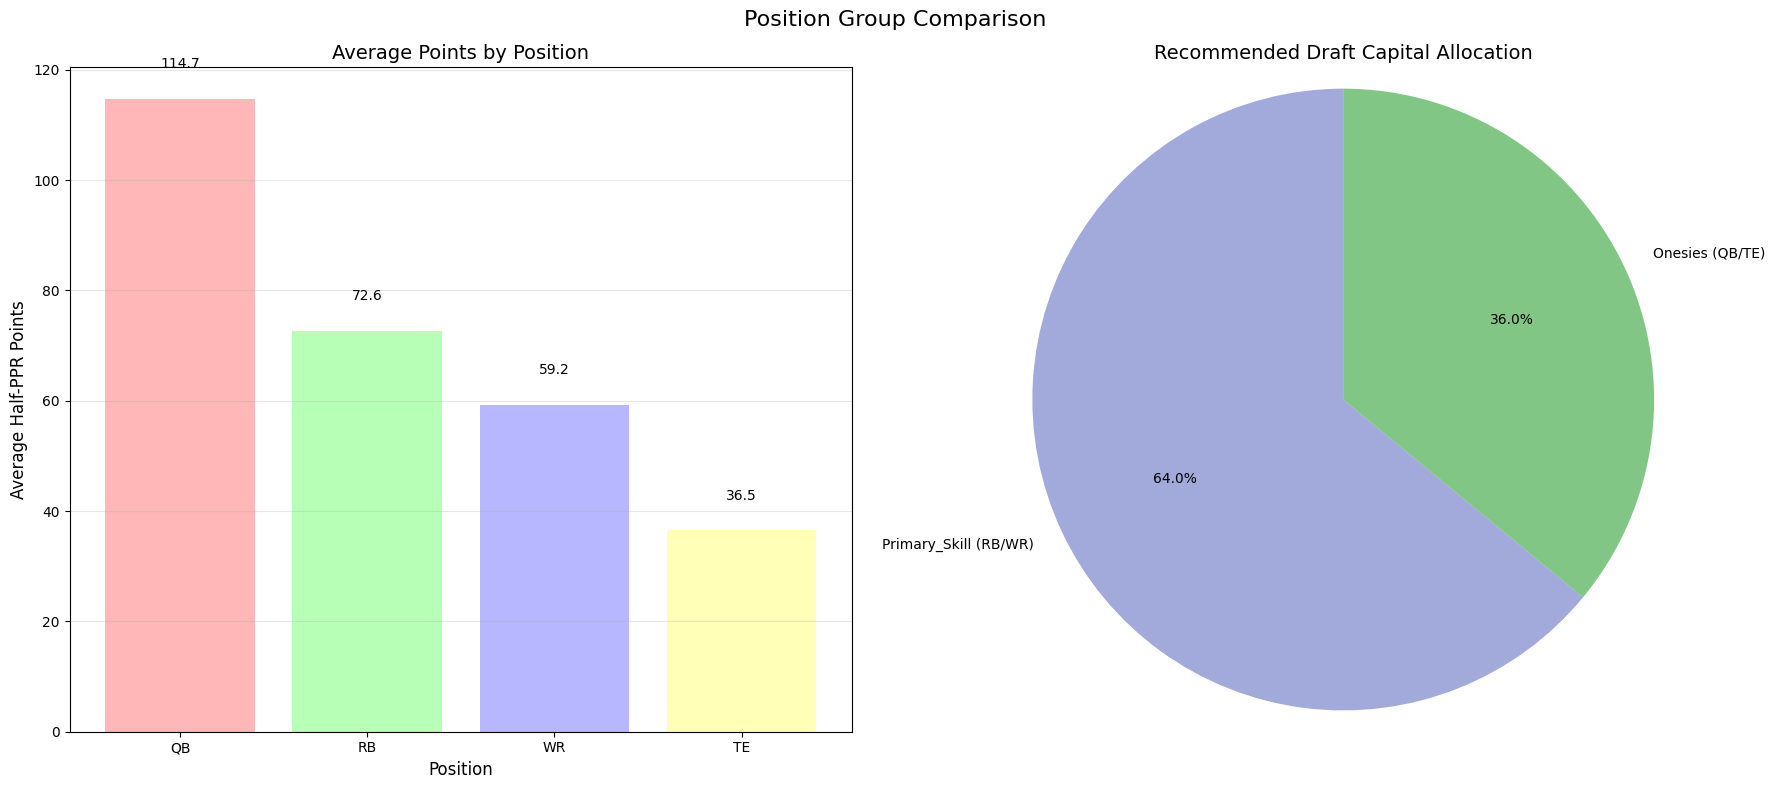

In [20]:
# 5. Create visualizations
# VORP by position
plt.figure(figsize=(12, 8))
plot_vorp_by_position(vorp_df)
plt.tight_layout()
plt.savefig('../outputs/figures/vorp_by_position.png')
plt.show()

# Positional scarcity
plt.figure(figsize=(14, 10))
plot_positional_scarcity(scarcity_results)
plt.tight_layout()
plt.savefig('../outputs/figures/positional_scarcity.png')
plt.show()

# Position group comparison
plt.figure(figsize=(12, 8))
plot_position_group_comparison(group_results)
plt.tight_layout()
plt.savefig('../outputs/figures/position_group_comparison.png')
plt.show()


In [21]:
# 6. Save processed data
vorp_df.to_csv(os.path.join(config['data_paths']['processed_data'], 'vorp_analysis.csv'), index=False)


In [22]:
# Save scarcity analysis
for key, df in scarcity_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

# Save position group analysis
for key, df in group_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

print("Positional value analysis completed!")

Positional value analysis completed!
